# Exploratory Data Analysis - Terrorism

---



## 1. Importing the dataset from Kaggle

In [19]:
#Importing Libraires
import numpy as np
import pandas as pd

#Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

# Uploading the Kaggle API key from my local device
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
# Creating the destination directory
!mkdir -p /root/.kaggle

In [5]:
import shutil

# Defining the source and destination paths
src_path = "/content/kaggle.json"
dst_path = "/root/.kaggle/kaggle.json"

# Moving the uploaded Kaggle API key to the correct location
shutil.move(src_path, dst_path)

# Setting appropriate permissions
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
# Searching for the dataset
!kaggle datasets list -s "Global Terrorism Database"

ref                                              title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
START-UMD/gtd                                    Global Terrorism Database                   29MB  2018-09-10 18:22:18          93673       2469  0.85294116       
northon/globalterrorismdatabase-compact          Global Terrorism Database_compact version   17MB  2018-02-15 10:57:38            686         16  0.5              
omercolakoglu/global-terrorism-database-turkish  Global Terrorism Database (Turkish)         74MB  2020-10-02 09:50:54            349        156  0.11764706       
serifkaya/global-terrorism-database              Global terrorism database                   27MB  2018-09-14 06:25:56            265         11  0.3529412        
chats351/gtd-dat

In [9]:
# Downloading the dataset
!kaggle datasets download -d START-UMD/gtd

 42% 12.0M/28.7M [00:00<00:00, 122MB/s]
100% 28.7M/28.7M [00:00<00:00, 154MB/s]


In [10]:
# Unzipping the dataset
!unzip gtd.zip

Archive:  gtd.zip
  inflating: globalterrorismdb_0718dist.csv  


In [11]:
# Loading the dataset into a DataFrame
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')

# Display the first few rows of the DataFrame
data

<ipython-input-11-d55da4f2a14c>:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


## 2. Getting familiar with the data

In [12]:
# Checking the number of rows and columns

data.shape

(181691, 135)

In [14]:
# Checking the names of the columns

data.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [15]:
# Getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [16]:
# Checking for duplicate values
data.duplicated().sum()

0

In [18]:
# Checking for null values
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

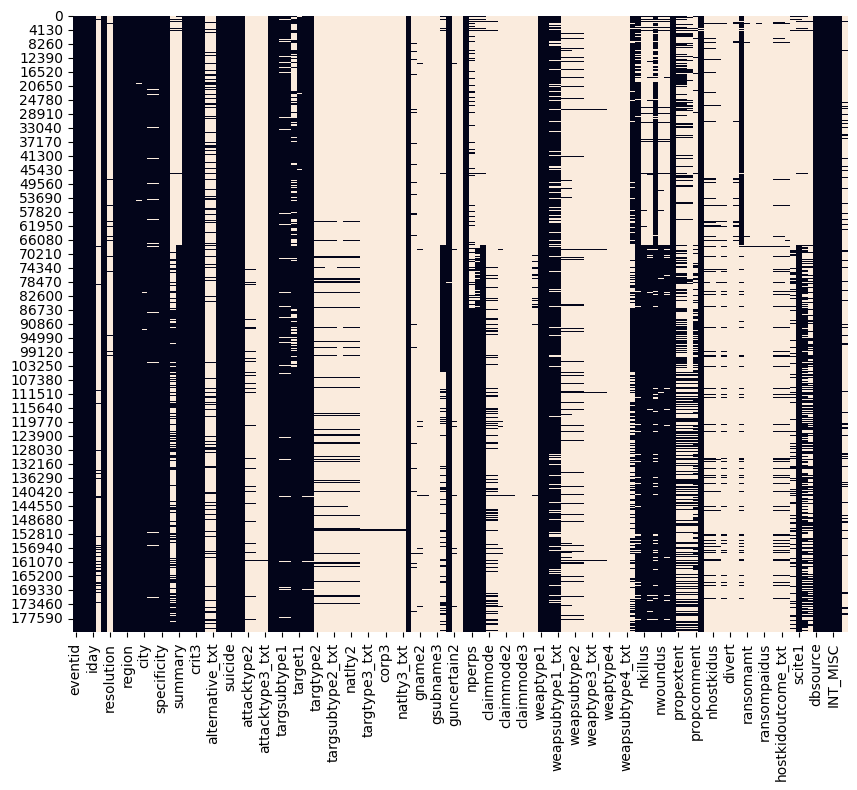

In [21]:
# Plotting heat map for null values
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [22]:
# Replacing any missing or NaN values in the weaptype1_txt,weaptype2_txt,weaptype3_txt column of the data dataframe with an empty string ''.

data['weaptype1_txt'] = data['weaptype1_txt'].fillna('')
data['weaptype2_txt'] = data['weaptype2_txt'].fillna('')
data['weaptype3_txt'] = data['weaptype3_txt'].fillna('')

#Concatenation

data['Weapon_type'] = data['weaptype1_txt'] + data['weaptype2_txt'] + data['weaptype3_txt']
data['Weapon_type']

0            Unknown
1            Unknown
2            Unknown
3         Explosives
4         Incendiary
             ...    
181686      Firearms
181687    Explosives
181688    Incendiary
181689    Explosives
181690    Explosives
Name: Weapon_type, Length: 181691, dtype: object

In [23]:
# Filling the missing values of target
data['targtype1_txt'] = data['targtype1_txt'].fillna('')
data['targtype2_txt'] = data['targtype2_txt'].fillna('')
data['targtype3_txt'] = data['targtype3_txt'].fillna('')

data['Targettype'] = data['targtype1_txt'] + data['targtype2_txt'] + data['targtype3_txt']
data['Targettype']

0         Private Citizens & Property
1             Government (Diplomatic)
2                 Journalists & Media
3             Government (Diplomatic)
4             Government (Diplomatic)
                     ...             
181686                       Military
181687                       Military
181688    Private Citizens & Property
181689           Government (General)
181690                        Unknown
Name: Targettype, Length: 181691, dtype: object

In [25]:
# Filling the missing values of victims nationality
data['natlty1_txt'] = data['natlty1_txt'].fillna('')
data['natlty2_txt'] = data['natlty2_txt'].fillna('')
data['natlty3_txt'] = data['natlty3_txt'].fillna('')
data['Victim_nationality'] = data['natlty1_txt'] + data['natlty2_txt'] + data['natlty3_txt']
data['Victim_nationality']

0         Dominican Republic
1                    Belgium
2              United States
3              United States
4              United States
                 ...        
181686               Somalia
181687                Russia
181688           Philippines
181689                 India
181690           Philippines
Name: Victim_nationality, Length: 181691, dtype: object

In [26]:
# Renaming columns
data.rename(columns={'event_id':'ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','Targettype':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'Weapon_type':'Weapon_type','motive':'Motive','property':'Property'},inplace=True)


In [27]:
# Taking important data in whole dataset that I'll be further processing and storing the dataframe in other variable
df=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Property']]

In [28]:
# Missing Values/Null Values Count
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target              0
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Property            0
dtype: int64

In [29]:
# Describing the data
df.describe(include='all')

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Property
count,181691.000000,181691.000000,181691.000000,181691,181270,181691,181257,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181691,115562,181691,181691,181691,50561,181691.000000
unique,NaN,NaN,NaN,205,2855,12,36674,NaN,NaN,9,NaN,NaN,665,112492,3537,22,209,14490,NaN
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Private Citizens & Property,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown,NaN
freq,NaN,NaN,NaN,24636,7645,50474,9775,NaN,NaN,88255,NaN,NaN,42230,100,82782,43511,85750,14889,NaN
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN,-0.544556
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN,3.122889
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-9.000000
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


**Columns Description**

Year  : the year in which the event happened

Month : the month in which the event happened

Day : the day on which the event happened

Country : the country where the event happened

State : the sate in which the event happened

Region : the region in which the event happened

City : the city in which the event happened

Latitude : latidue of the place

Longitude : longitude of the place

AttackType : what type of attack it was

Killed : how many were killed

Wounded : how many were wounded

Target : what the taget was

Summary : police report of the incident or what the authority says on the incident

Group : which organization was behind the attack

Target_type : what type the target was

Weapon_type : what was the weapon type

Motive : what was the motive

## 3. Data Stats

In [30]:
# Which years had the most attacks
most_attacked_years=df['Year'].value_counts(dropna=False)
most_attacked_years.sort_values(ascending=False).head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

In [31]:
# Cities which have been attacked the most
most_attacked_city=df['city'].value_counts().sort_values(ascending=False)
most_attacked_city

Unknown       9775
Baghdad       7589
Karachi       2652
Lima          2359
Mosul         2265
              ... 
Shahkoh          1
Pleiku           1
Mabigo           1
Engelsdorf       1
Kubentog         1
Name: city, Length: 36674, dtype: int64

In [32]:
# Country with the most attacks
most_attacked_country= df['Country'].value_counts(dropna=False).sort_values(ascending=False)
most_attacked_country

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

In [33]:
# Rregion with the most attacks
most_attacked_region= df['Region'].value_counts(dropna=False).sort_values(ascending=False)
most_attacked_region

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [34]:
# Which month the most attacks have been conducted
most_attacked_months= df['Month'].value_counts(dropna=False).sort_values(ascending=False)
most_attacked_months

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64

In [35]:
# Most attcking group
most_attacking_group= df['Group'].value_counts().sort_values(ascending=False)
most_attacking_group

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Thadou People's Liberation Army (TPLA)                  1
Quit Kashmir Movement (QKM)                             1
Cells of Direct Attack - Living Waste Group             1
Conspiracy of Vengeful Arsonists                        1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64

In [36]:
# Most common type of attack
most_attack_type= df['AttackType'].value_counts().sort_values(ascending=False).reset_index()
most_attack_type

,index,AttackType
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


In [40]:
# Summarizing the data
print("Country with the most attacks:",most_attacked_country.index[0])
print("City with the most attacks:",most_attacked_city.index[1]) #as first entry is unknown
print("Region with the most attacks:",most_attacked_region.idxmax())
print("Year with the most attacks:",most_attacked_years.idxmax())
print("Month with the most attacks:",most_attacked_months.idxmax())
print("Group with the most attacks:",most_attacking_group.index[1])# as first entry is unknown
print("Most Common Attack Type:",most_attack_type.loc[0, 'index'])

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Common Attack Type: Bombing/Explosion


## 4. Data Visualization

In [41]:
# Making a custom function for gradients in map to make it more visually appealing
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

### Attacks by Year

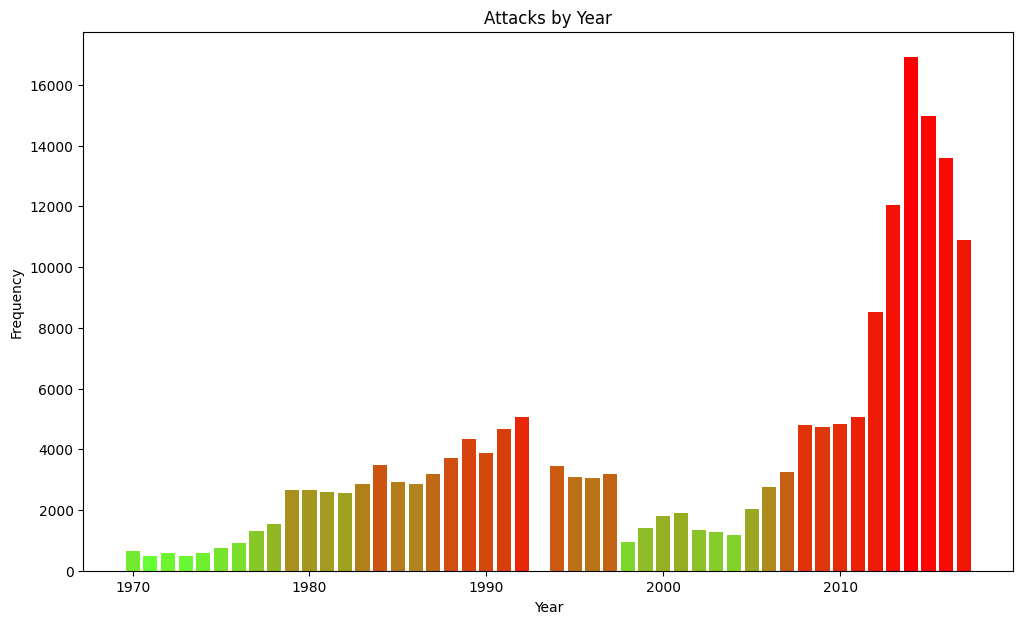

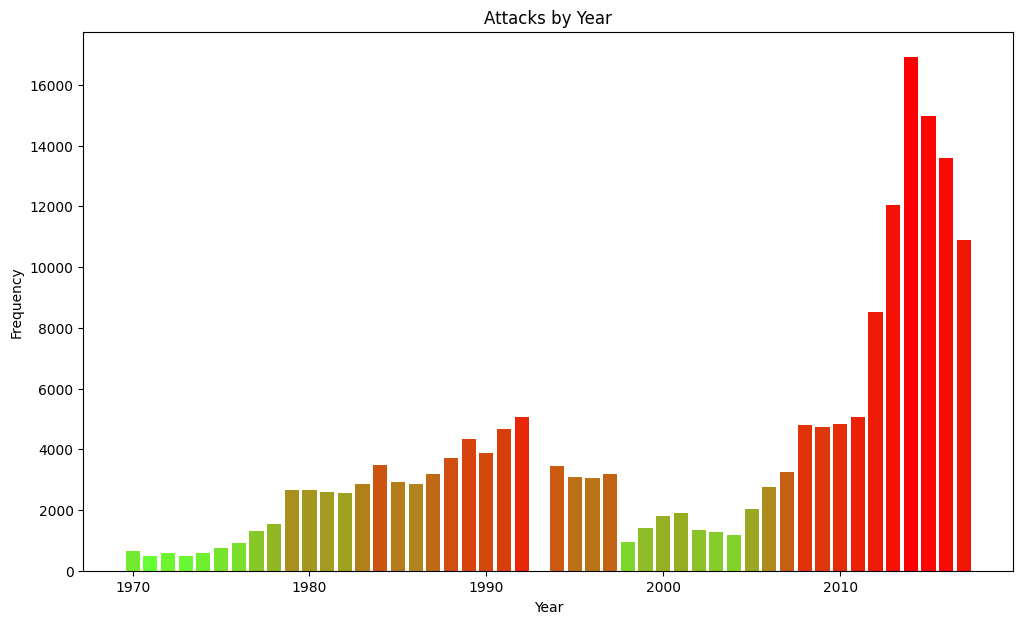

In [43]:
# Creating a bar graph
plt.figure(figsize=(12,7))
color1 = "#ff0000"
color2 = "#66ff33"
plt.bar(most_attacked_years.index, most_attacked_years.values, color=get_color_gradient(color1, color2,len(most_attacked_years.values)))

# Setting the X and Y labels
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Attacks by Year")

# Displaying the graph
plt.show()

We can see that:

* from 1970 to 1992 there is an upward trend in attacks
* from 1993 to 2004 there is a downward trend in attacks
* from 2005 onwards there is again an upward trend in attacks with year 2014 having the  maximum number of attacks

### Attacks by Month

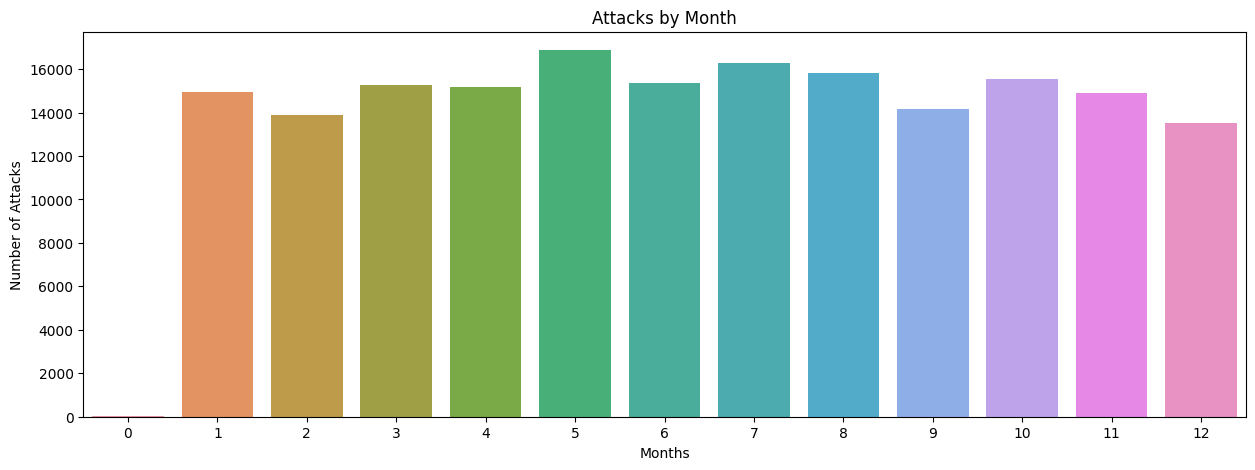

In [44]:
# Plotting a bar graph
plt.figure(figsize=(15,5))
plt.title('Attacks by Month')
sns.countplot(x=df.Month)
plt.xlabel("Months")
plt.ylabel("Number of Attacks")
plt.show()

* Here we can see that most attacks took place in 5th month i.e. May
* Rest of the months have total number of attacks between 12000 to 16000

### Most Attacked Days

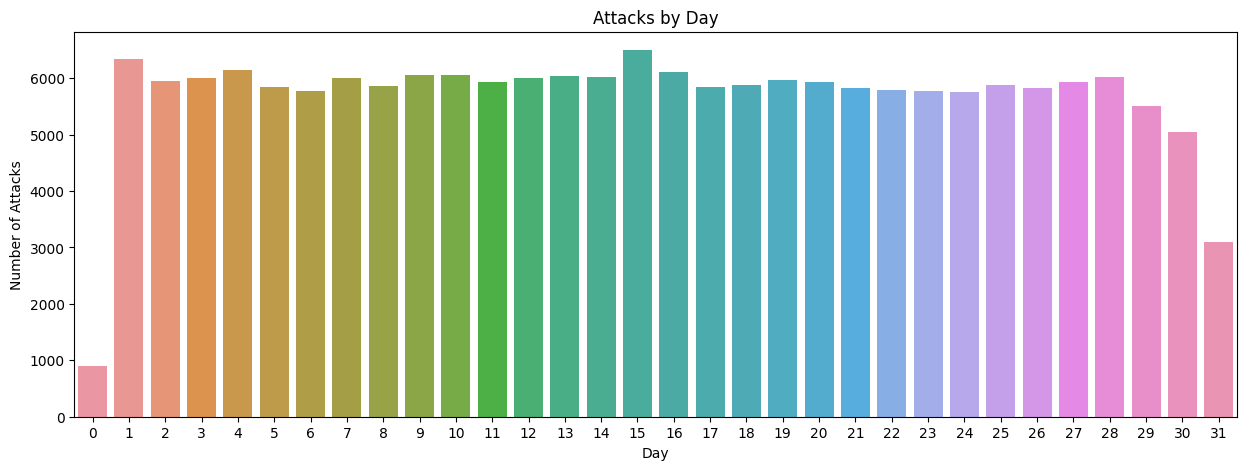

In [45]:
# Plotting a bar graph
plt.figure(figsize=(15,5))
plt.title('Attacks by Day')
sns.countplot(x=df.Day)
plt.xlabel("Day")
plt.ylabel("Number of Attacks")
plt.show()

First day and 15th day of the months are when most attacks take place while end of the month is when the least attacks take place

### Most Attacked Target

In [46]:
# Assigning most attacked target values to mat
mat=df['Target'].value_counts()
mat

Private Citizens & Property                                  42230
Military                                                     24876
Police                                                       22098
Government (General)                                         19950
Business                                                     19739
                                                             ...  
Religious Figures/InstitutionsJournalists & MediaMilitary        1
Educational InstitutionGovernment (General)Military              1
Private Citizens & PropertyTelecommunicationUtilities            1
TelecommunicationGovernment (General)                            1
BusinessNGONGO                                                   1
Name: Target, Length: 665, dtype: int64

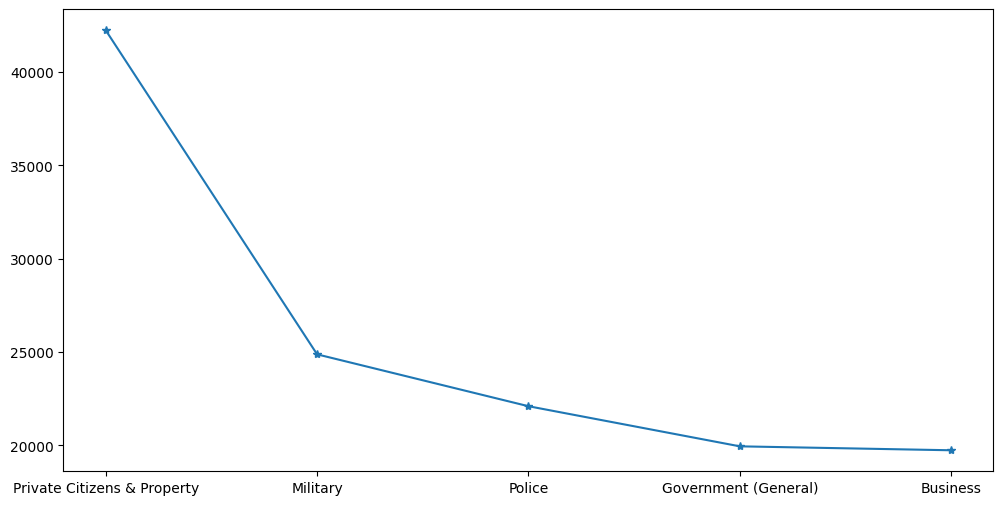

In [50]:
# Plotting a line graph
plt.figure(figsize=(12,6))
plt.plot(mat.head(5),marker='*')
plt.xticks(rotation=0)
plt.show()

Civilians are the most targeted group followed by the military and police

### Most Active Terrorist Groups

In [51]:
active_group = most_attacking_group[1:11]
active_group

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

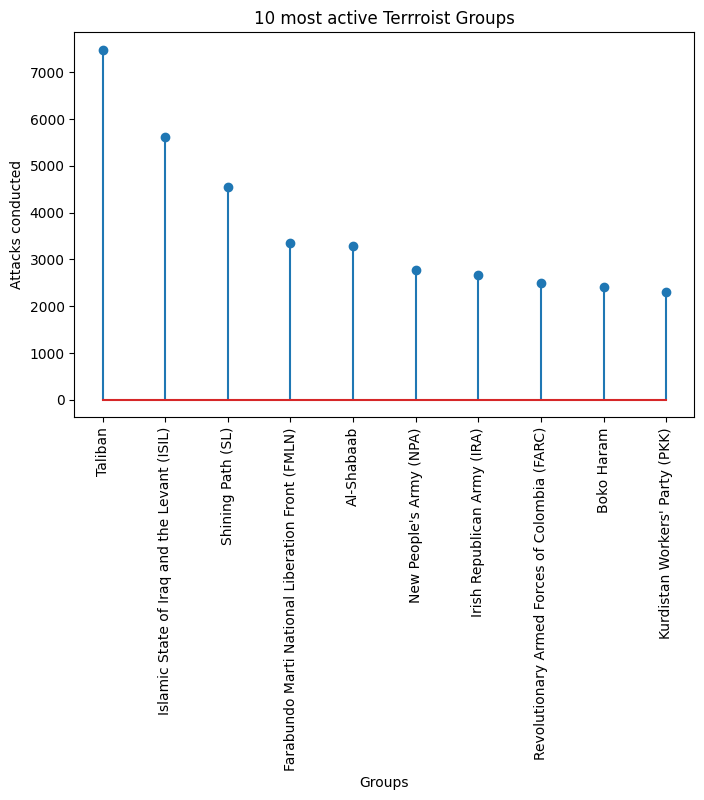

In [52]:
# Creating a stem graph
plt.figure(figsize=(8,5))
plt.stem(active_group.index, active_group.values)

plt.title("10 most active Terrroist Groups")
plt.xticks(rotation=90)
plt.xlabel("Groups")
plt.ylabel("Attacks conducted")

plt.show()

Taliban is the most active group at the top of followed by ISIL and Shining Path(SL)

### Terrrorist Groups causing the maximum damage

In [53]:
# Sorting lethal groups on the basis of killed and wounded
lethal_groups= df.groupby('Group')['Killed','Wounded'].sum().sort_values(by=['Killed','Wounded'], ascending=False)
lethal_groups

,Killed,Wounded
Group,,
Unknown,112367.0,210339.0
Islamic State of Iraq and the Levant (ISIL),38923.0,30672.0
Taliban,29410.0,27932.0
Boko Haram,20328.0,9473.0
Shining Path (SL),11601.0,3031.0
...,...,...
Zero Tolerance,0.0,0.0
Zimbabwe People's Army (ZIPA),0.0,0.0
Zuwar al-Imam Rida,0.0,0.0


In [54]:
# Adding a total column to lethal_groups
lethal_groups['TotalKW']=lethal_groups['Killed']+lethal_groups['Wounded']
lethal_groups

,Killed,Wounded,TotalKW
Group,,,
Unknown,112367.0,210339.0,322706.0
Islamic State of Iraq and the Levant (ISIL),38923.0,30672.0,69595.0
Taliban,29410.0,27932.0,57342.0
Boko Haram,20328.0,9473.0,29801.0
Shining Path (SL),11601.0,3031.0,14632.0
...,...,...,...
Zero Tolerance,0.0,0.0,0.0
Zimbabwe People's Army (ZIPA),0.0,0.0,0.0
Zuwar al-Imam Rida,0.0,0.0,0.0


In [55]:
# Selecting top 10 lethal groups excluding unknown
top_ten_lethal_groups= lethal_groups[1:11].reset_index()
top_ten_lethal_groups

,Group,Killed,Wounded,TotalKW
0,Islamic State of Iraq and the Levant (ISIL),38923.0,30672.0,69595.0
1,Taliban,29410.0,27932.0,57342.0
2,Boko Haram,20328.0,9473.0,29801.0
3,Shining Path (SL),11601.0,3031.0,14632.0
4,Liberation Tigers of Tamil Eelam (LTTE),10989.0,11031.0,22020.0
5,Al-Shabaab,9330.0,7624.0,16954.0
6,Farabundo Marti National Liberation Front (FMLN),8065.0,4065.0,12130.0
7,Nicaraguan Democratic Force (FDN),6662.0,734.0,7396.0
8,Tehrik-i-Taliban Pakistan (TTP),6042.0,9532.0,15574.0
9,Revolutionary Armed Forces of Colombia (FARC),5661.0,4354.0,10015.0


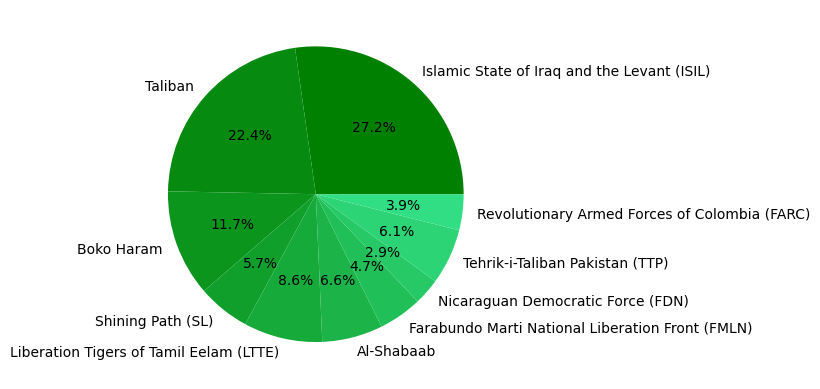

In [56]:
# Plotting a pie chart
color1='#008000'
color2='#32de84'
y = top_ten_lethal_groups['TotalKW']
mylabels = top_ten_lethal_groups['Group']
plt.pie(y, labels = mylabels,autopct='%1.1f%%', colors=get_color_gradient(color1, color2, len(y) ))
plt.show()

Groups which have caused the most human damage are Islamic State of Iraq and the Levant(ISIL) accountinng to 27.2% of damage and then comes Taliban with 22.4% damage and then Boko Haram with 11.7% damage

### Terrorist Activity by Region each year

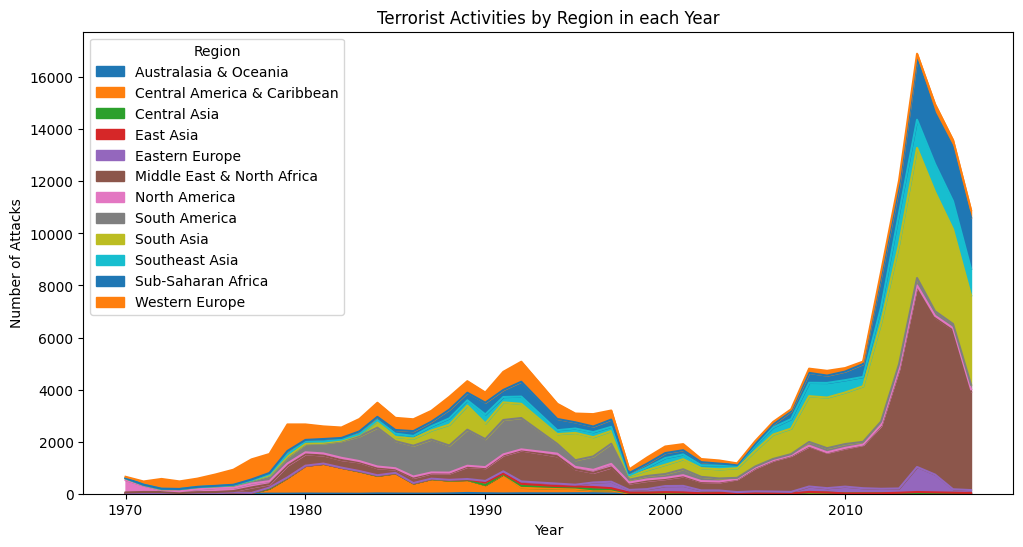

In [57]:
# Plotting an area graph
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(12,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

* Most attacked regions are Middle East & North Africa and South Asia
* Least attacked regions are Australia & Oceania, Central Asia and East Asia

### Most Affected Countries

In [58]:
most_affected_country= df.groupby('Country')['Killed','Wounded'].sum().sort_values(by=['Killed','Wounded'],ascending=False).reset_index()
most_affected_country['Total_casualities']=most_affected_country['Killed']+most_affected_country['Wounded']
most_affected_country.loc[0:9]

,Country,Killed,Wounded,Total_casualities
0,Iraq,78589.0,134690.0,213279.0
1,Afghanistan,39384.0,44277.0,83661.0
2,Pakistan,23822.0,42038.0,65860.0
3,Nigeria,22682.0,10239.0,32921.0
4,India,19341.0,28980.0,48321.0
5,Sri Lanka,15530.0,15561.0,31091.0
6,Syria,15229.0,14109.0,29338.0
7,Colombia,14698.0,10328.0,25026.0
8,Peru,12771.0,4078.0,16849.0
9,El Salvador,12053.0,5062.0,17115.0


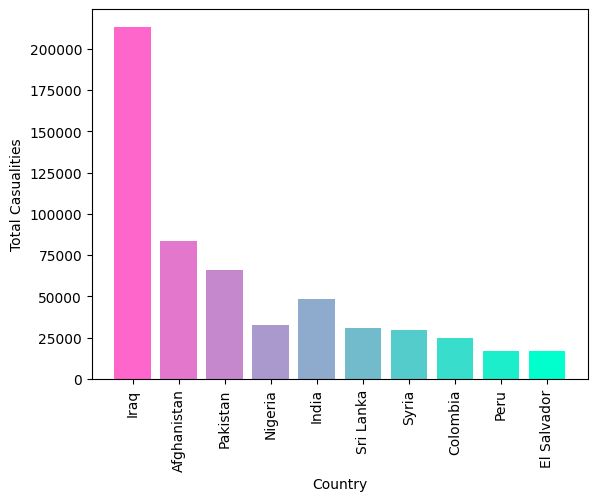

In [59]:
# Plotting a bar graph
color1="#ff66cc"
color2="#00ffcc"
plt.bar(most_affected_country['Country'].head(10),most_affected_country['Total_casualities'].head(10), color= get_color_gradient(color1, color2, n=10))
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Casualities")
plt.show()

Top 10 affected countries are:

1. Iraq
2. Afghanistan
3. Pakistan
4. India
5. Nigeria
6. Sri Lanka
7. Syria
8. Colombia
9. Peru
10. El Salvador

### Most Common Attacks

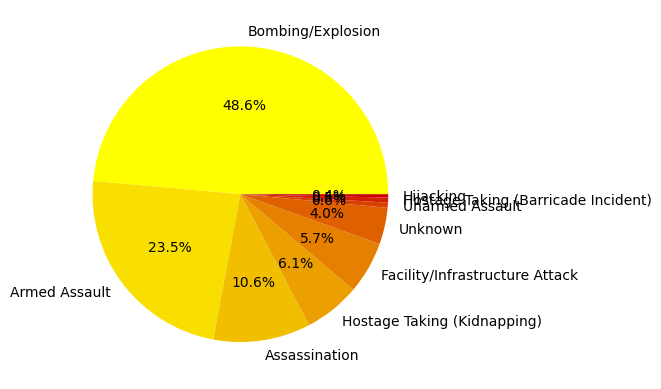

In [60]:
# Plotting a pie chart
color1= '#ffff00'
color2='#cc0000'
explode = [0.1] * len(y)
y = most_attack_type['AttackType']
mylabels = most_attack_type['index']
plt.pie(y, labels = mylabels,autopct='%1.1f%%', colors= get_color_gradient(color1, color2, len(y)))#explode= explode can be added for better visualization
plt.show()

Bombing/Explosing was the most common attack type

### Most Common Weapons

In [63]:
# Storing value of most popular weapon in dfw
dfw=df['Weapon_type'].value_counts().reset_index()
dfw

,index,Weapon_type
0,Explosives,85750
1,Firearms,53618
2,Unknown,14990
3,Incendiary,10304
4,ExplosivesFirearms,3851
...,...,...
204,Fake WeaponsFake WeaponsFake Weapons,1
205,UnknownFirearmsUnknown,1
206,OtherIncendiary,1
207,FirearmsIncendiaryFirearms,1


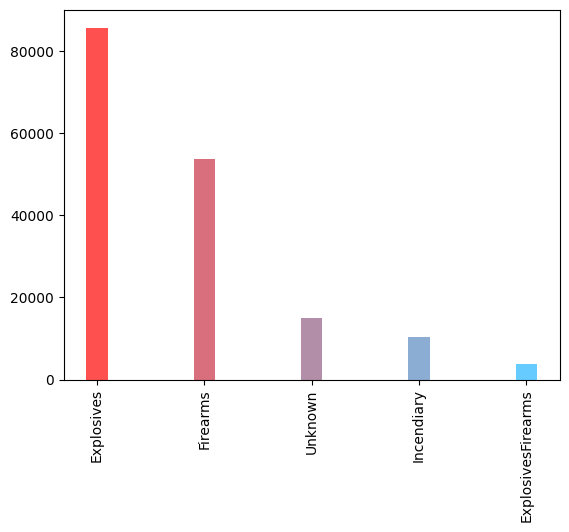

In [62]:
# Plotting a bar chart
color1="#ff5050"
color2="#66ccff"
plt.bar(dfw['index'].head(5),dfw['Weapon_type'].head(5), color= get_color_gradient(color1, color2, n=5), width=0.2)
plt.xticks(rotation=90)
plt.show()

Explosives are the most common type of weapon used and it has taken lives of more than 80000 people worldwide

### Most affected countries and the type of attacks

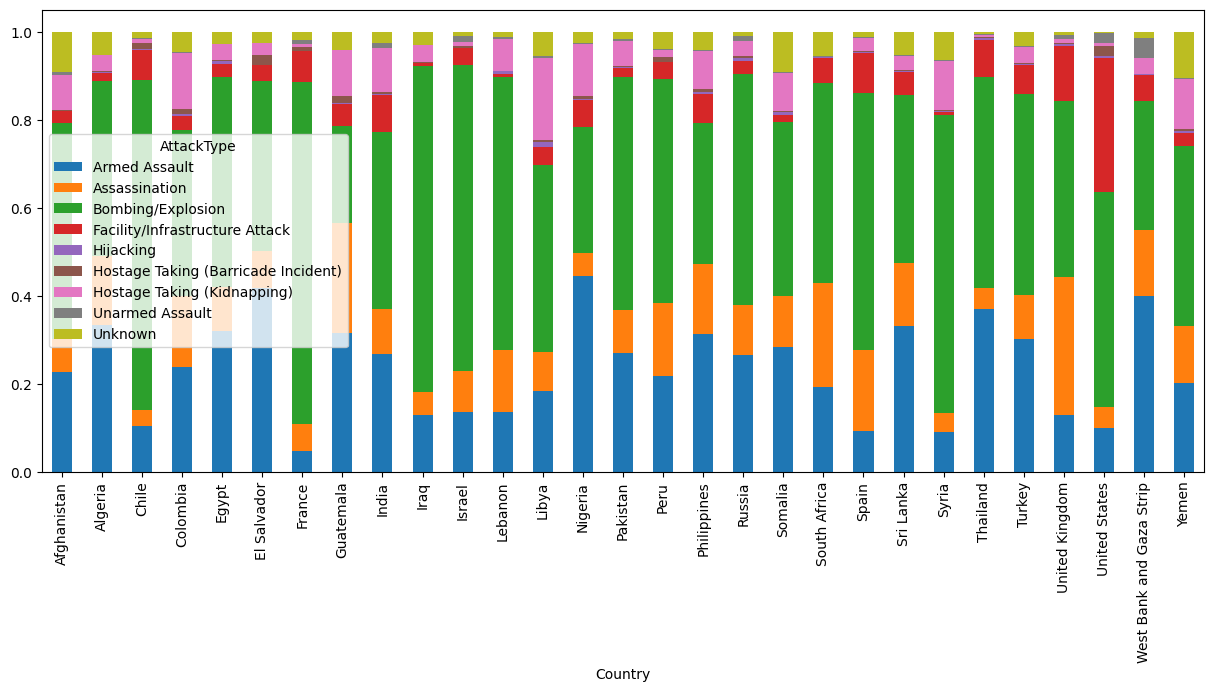

In [64]:
country_counts = df['Country'].value_counts()

# Selecting countries with count more than 2000
selected_countries = country_counts[country_counts > 2000].index

# Filtering the dataset to include only the selected countries
selected_data = df[df['Country'].isin(selected_countries)]

# Creating cross-tabulation of selected data
cross_tab = pd.crosstab(selected_data['Country'], selected_data['AttackType'], normalize='index')

# Plotting a stacked bar chart
cross_tab.plot(kind='bar', stacked=True , figsize=(15,6))

plt.show()

Amongst the attack types, bombing/explosion was the most preferred attack type of the terrorist organizations.

Based on the analysis of the chosen attack types, it has been observed that Bombing, Armed assault, and Assassination collectively account for 83% of the total attacks.

Amongst the targeted countries Iraq, Pakistan, Afghanistan, India suffered the most.

In countries like : Algeria, El Salvador , Gautemala , Nigeria , Phillipines , Sri Lanks , West Bank and Gaza Strip. Armed assault and Assassination together constitues almost 50% of the total attacks . This does not mean that these countries are saved from bombings and explosions as the next half is dominated by bombings.

Facility/Infrastructure attacks are seen the most in US.

Hostage taking is seen the most in countries like Libya. Other countries in the list are

African Countries : Nigeria , Somalia

Asian Countries : India , Philippines

Latin American Countries : Guatemala , Colombia

Middle East Countries : Yemen , Syria

Hijacking is seen the most in Libya. Other countries in the list are US, Russia, Somalia, Egypt and Phillipines

Bombings/Explosions constitues a significant share in total attack types in almost all the countries but it occupies almost 80-90% of the share in countries like : France, Chile, Iraq

A lot of attack data from countries like Yemen , Somalia , Libya , Afghanistan is unknown.

### Year wise distribution of attack frequency in most affected countries

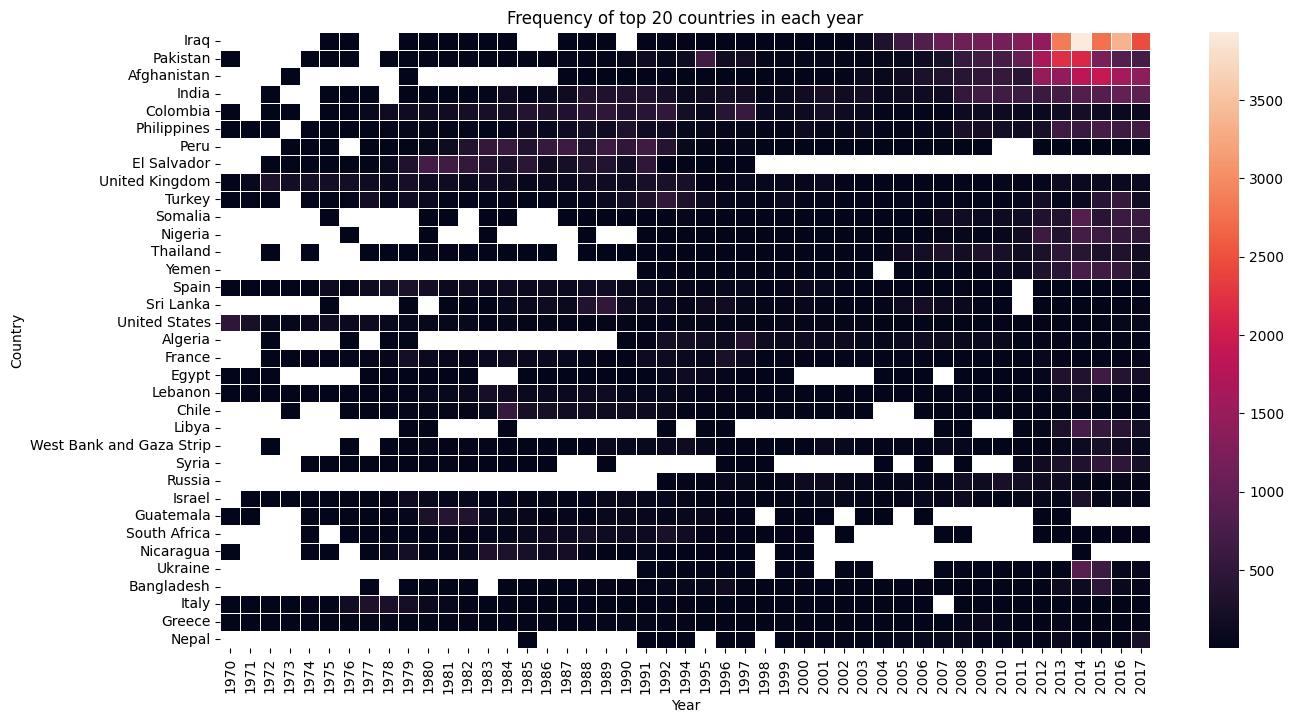

In [65]:
# Selecting the columns of interest
dfc = df[['Year', 'Country']]

country_counts1 = df['Country'].value_counts()

# Selecting countries with count more than 1000
selected_countries1 = country_counts1[country_counts1 > 1000].index.tolist()

selected_data1 = df[df['Country'].isin(selected_countries1)]

# Grouping by year and country, then counting the number of attacks for each year and country combination.
mf = selected_data1.groupby(['Year', 'Country']).size().reset_index(name='count')

# Pivoting the data to have years as columns and countries as rows
mf_pivot = mf.pivot(index='Country', columns='Year', values='count')

# Sorting by the total number of attacks in descending order
mf_pivot = mf_pivot.loc[mf_pivot.sum(axis=1).sort_values(ascending=False).index]

# Plotting the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(mf_pivot, annot=False, fmt=".1f", linewidths=.5)
plt.title('Frequency of top 20 countries in each year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

* Attacks in Iraq are on a rise and touched its peak in 2014
* Afghanistan and Pakistan both the countries witnessed increased attack frequency in 2008-2015 but are currently showing a declining trend
* India is showing a continuous upward trend in attack frequency

### Countries that have been attacked by different terrorist groups

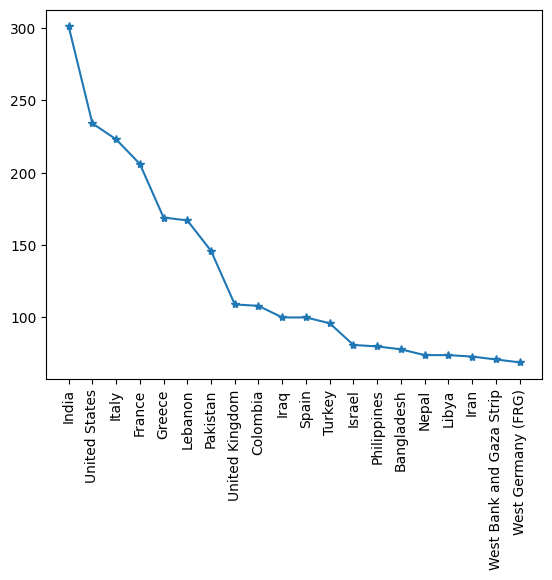

Country
India                       301
United States               234
Italy                       223
France                      206
Greece                      169
Lebanon                     167
Pakistan                    146
United Kingdom              109
Colombia                    108
Iraq                        100
Spain                       100
Turkey                       96
Israel                       81
Philippines                  80
Bangladesh                   78
Nepal                        74
Libya                        74
Iran                         73
West Bank and Gaza Strip     71
West Germany (FRG)           69
Name: Group, dtype: int64


In [66]:
# Grouping countries with organizations
group_country = df.groupby('Country')['Group'].nunique()

group_country.sort_values(ascending= False , inplace= True)

# Taking top 20 countries
group_country_20 = group_country.head(20)

plt.plot(group_country_20,marker='*')
plt.xticks(rotation=90)
plt.show()

print(group_country_20)

We can see that India has been attacked by 301 different groups, United States has been attacked by 234 different group and then Italy which has been attacked by 223 different groups

### Deaths per Year

In [68]:
# Making a dataframe dfx and assigning value of deaths per year in it
dfx=pd.DataFrame(df.groupby('Year')["Killed"].sum()).reset_index()
dfx

,Year,Killed
0,1970,174.0
1,1971,173.0
2,1972,566.0
3,1973,370.0
4,1974,539.0
5,1975,617.0
6,1976,674.0
7,1977,456.0
8,1978,1459.0
9,1979,2100.0


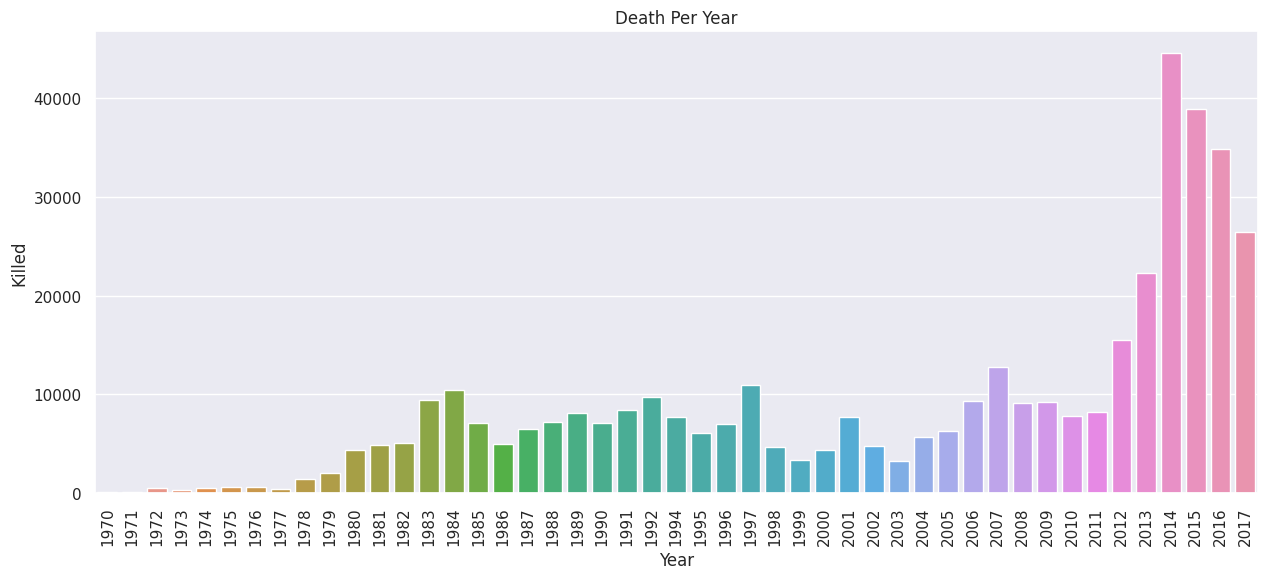

In [69]:
# Plotting a bar graph
sns.set(rc={'figure.figsize': (15, 6)})# set figure size
sns.barplot(data=dfx,x='Year',y='Killed')
plt.title("Death Per Year")
plt.xticks(rotation=90)
plt.show()

We can see that there is a sharp rise in number of deaths after 2011 till year 2014 and after 2014 we can see decline in deaths

## 5. Conclusion

In conclusion, the exploratory data analysis of global terrorism data has provided valuable insights into the patterns and trends of terrorist activities over the years. Here are some key takeaways:

1. **Temporal Analysis**:
   - The dataset spans from 1970 to 2017, with notable shifts in the frequency of terrorist attacks.
   - There was a significant increase in terrorist attacks from 1970 to 1992, followed by a decline until around 2004. Afterward, there was another notable increase in attacks.
   - The year 2014 recorded the highest number of terrorist attacks, indicating a recent surge in global terrorism.

2. **Geographical Analysis**:
   - The Middle East & North Africa and South Asia are the regions most affected by terrorism, while Australia & Oceania, Central Asia, and East Asia have experienced fewer attacks.
   - Iraq, Afghanistan, Pakistan, India, and Colombia are the countries with the highest numbers of terrorist attacks.
   - Baghdad, Karachi, and Lima are the cities that have been attacked the most frequently.

3. **Target Analysis**:
   - Private citizens and property are the most frequently targeted, followed by military and police targets.
   - The most active terrorist group in the dataset is the Taliban, followed by the Islamic State of Iraq and the Levant (ISIL).

4. **Attack Types**:
   - Bombing/explosion is the most common type of terrorist attack, followed by armed assault and assassination.
   - Explosives are the most commonly used weapons in these attacks.

5. **Casualty Analysis**:
   - The Islamic State of Iraq and the Levant (ISIL) and the Taliban have caused the most significant human casualties, accounting for a substantial portion of total deaths and injuries.

6. **Regional Trends**:
   - Terrorism activity varies across regions and has evolved over the years. Middle East & North Africa and South Asia have consistently experienced higher activity.
   - Western Europe and North America have comparatively lower attack frequencies.

7. **Day-wise Analysis**:
   - The first and 15th days of the month tend to have the highest number of attacks, while the end of the month has the lowest.

8. **Month-wise Analysis**:
   - May is the month with the highest number of attacks, followed by July and August.

These findings provide valuable insights for policymakers, security agencies, and researchers to understand and combat terrorism effectively. It is crucial to continue monitoring and analyzing such data to develop strategies for preventing and responding to terrorist threats worldwide.